In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as cx
from Ames_Functions import *
from shapely.geometry import Point

In [5]:
df_house_2021 = pd.read_csv("df_RE_latlongs_v3_2021.csv", index_col = 0)
df_house_2019 = load_state_pkl()["df_RE_latlong2019"][0]
df_biz = pd.read_csv("df_EssentialLatLong_v2.csv")
df_shp = gpd.read_file("Ames_Precinct_Boundaries/Ames_-_Precincts_2.shp")

In [ ]:
df_wm_house = {}
df_wm_house[""]

In [153]:
wm_house_dict = {}
wm_house_dict["2019"] = gpd.GeoDataFrame(df_house_2019.join(df_house_2019.apply(lambda x: Point(x.Long, x.Lat), axis = 1).rename("geometry")), crs = "epsg:4326").to_crs(epsg = 3857)
wm_house_dict["2021"] = gpd.GeoDataFrame(df_house_2021.join(df_house_2021.apply(lambda x: Point(x.Long, x.Lat), axis = 1).rename("geometry")), crs = "epsg:4326").to_crs(epsg = 3857)
df_wm_biz = gpd.GeoDataFrame(df_biz.join(df_biz.apply(lambda x: Point(x.Long, x.Lat), axis = 1).rename("geometry")), crs = "epsg:4326").to_crs(epsg = 3857)

In [7]:
df_wm = df_shp.to_crs(epsg = 3857)

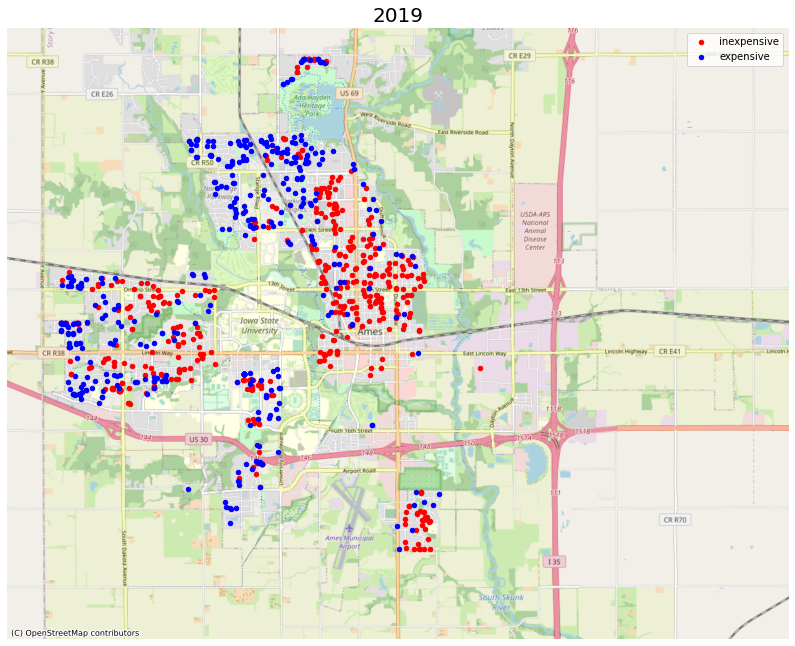

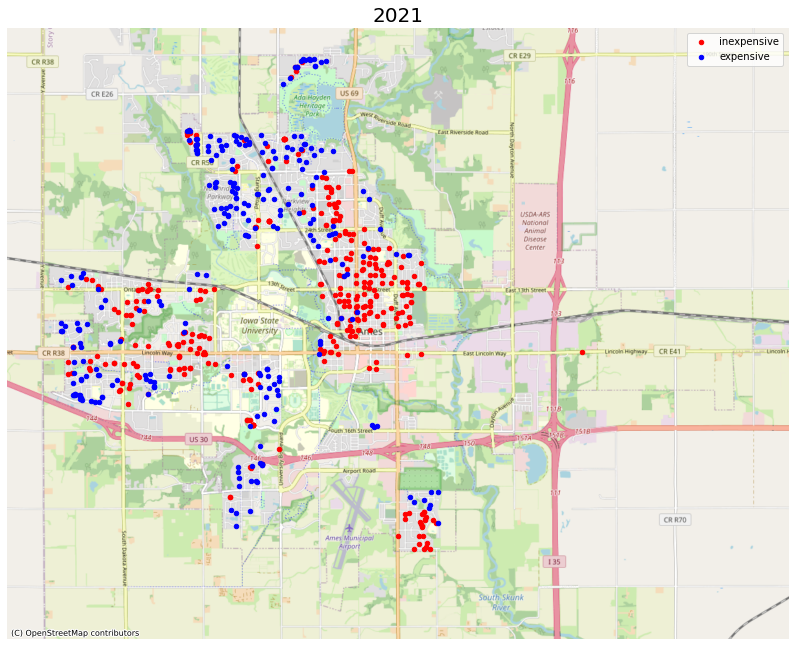

In [16]:
for year in ["2019", "2021"]:
    ax = df_wm.query("index > 0").plot(figsize = (14,14), alpha = 0)
    wm_house_dict[year].query("SalePrice <= SalePrice.mean()").plot(ax = ax, markersize = 20, color = "red", marker = "o", label = "inexpensive")
    wm_house_dict[year].query("SalePrice > SalePrice.mean()").plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = "expensive")
    cx.add_basemap(ax = ax, source = cx.providers.OpenStreetMap.Mapnik)
    plt.axis("off")
    plt.title(year, fontdict = {"fontsize":"20"})
    plt.legend()
    plt.show()
    #df_shp.query("index >= 5").plot(ax = ax, figsize = (14,14), color = "red", edgecolor = "black")

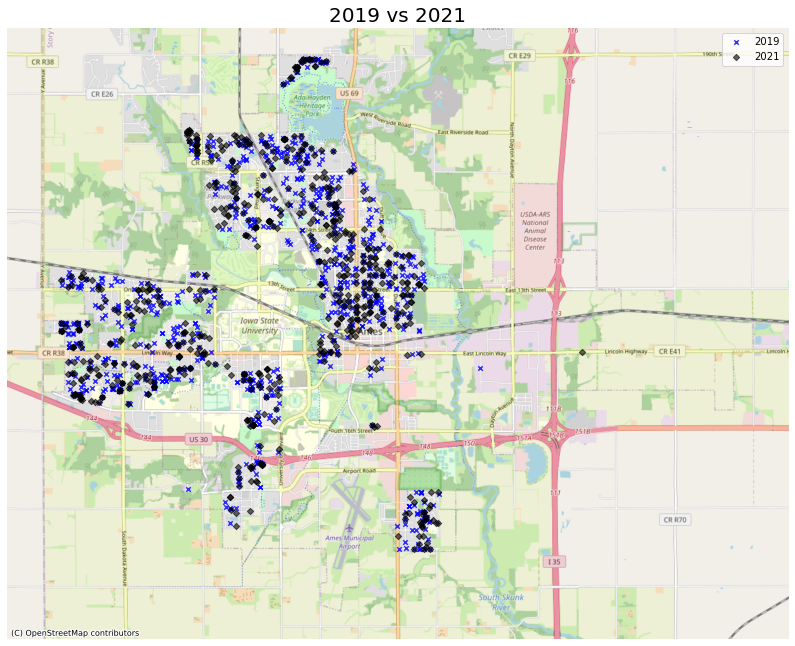

In [43]:
ax = df_wm.query("index > 0").plot(figsize = (14,14), alpha = 0)
wm_house_dict["2019"].plot(ax = ax, markersize = 20, color = "blue", marker = "x", label = "2019", alpha = 0.8)
wm_house_dict["2021"].plot(ax = ax, markersize = 20, color = "k", marker = "D", label = "2021", alpha = 0.6)
cx.add_basemap(ax = ax, source = cx.providers.OpenStreetMap.Mapnik)
plt.axis("off")
plt.title("2019 vs 2021", fontdict = {"fontsize": "20"})
plt.legend()
plt.show()

In [121]:
def plot_by_attribute (attr):
    fig,axs = plt.subplots(2,2, figsize = (18,18))
    for r,c in [(row, col) for row in range(2) for col in range(2)]:
        year = "2019" if r == 0 else "2021"
        cond = f"{attr} <= {attr}.mean()" if c == 0 else f"{attr} > {attr}.mean()"
        ax = axs[r,c]
        df_wm.query("index > 0").plot(ax = ax, alpha = 0)
        wm_house_dict[year].query(cond).plot(ax = ax, markersize = 20, color = "red", marker = "o")
        #wm_house_dict[year].query(f"{attr} > {attr}.mean()").plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = f"{attr} above mean")
        cx.add_basemap(ax = ax, source = cx.providers.OpenStreetMap.Mapnik)
        ax.axis("off")
        ax.set_title(f"{year} : {cond}", fontdict = {"fontsize":"20"})
    #df_shp.query("index >= 5").plot(ax = ax, figsize = (14,14), color = "red", edgecolor = "black")

def plot_by_categorical_attribute (attr, year):
    attr_list = wm_house_dict[year][attr].unique()
    num_ax = attr_list.shape[0]
    fig,axs = plt.subplots(num_ax//4 + 1, 4, figsize = (25,25))
    for i,ax in enumerate(axs.ravel()): #[(row, row, 1) for row in range(num_ax)]:
        #year = "2019" if r == 0 else "2021"
        if i >= num_ax:
            ax.axis("off")
            continue
        cond = f"{attr} == \"{attr_list[i]}\""
        #ax = axs[r]
        df_wm.query("index > 0").plot(ax = ax, alpha = 0)
        wm_house_dict[year].query(cond).plot(ax = ax, markersize = 20, color = "red", marker = "o")
        #wm_house_dict[year].query(f"{attr} > {attr}.mean()").plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = f"{attr} above mean")
        cx.add_basemap(ax = ax, source = cx.providers.OpenStreetMap.Mapnik)
        ax.axis("off")
        ax.set_title(f"{year} : {cond}", fontdict = {"fontsize":"20"})
    #df_shp.query("index >= 5").plot(ax = ax, figsize = (14,14), color = "red", edgecolor = "black")

In [ ]:
wm_house_dict["2019"].select_dtypes(include = "object")["Ext1"].value_counts(normalize = True)#, wm_house_dict["2021"].select_dtypes(include = "object")["SaleCond"].unique()#.shape[0]

In [127]:
wm_house_dict["2019"].columns

Index(['SaleID', 'MapRefNo', 'GeoRefNo', 'Tier', 'Range', 'Prop_Addr',
       'ZngCdPr', 'ZngCdSc', 'ZngOLPr', 'ZngOLSc', 'ClassPr_S', 'ClassSc_S',
       'Legal_Pr', 'SchD_S', 'TxD_S', 'MA_Ownr1', 'MA_Ownr2', 'MA_Line1',
       'MA_Line2', 'MA_City', 'MA_State', 'MA_Zip1', 'MA_Zip2', 'Rcrd_Yr',
       'Rcrd_Mo', 'Inst1_No', 'Inst1_Yr', 'Inst1_Mo', 'Inst1TPr', 'LndAc_S',
       'ImpAc_S', 'OthAc_S', 'TtlVal_AsrYr', 'ValType', 'X1TPr_D', 'X1TSc_D',
       'X2TPr_D', 'X2TSc_D', 'X1TPr_S', 'X1TSc_S', 'X2TPr_S', 'X2TSc_S',
       'LndAcX1S', 'ImpAcX1S', 'ImpAcX2S', 'HSTtl_D', 'MilVal_D', 'HSTtl_S',
       'MilVal_S', 'AcreX_S1', 'AcreGr', 'AcreNt_S', 'Neighborhood', 'LotArea',
       'ParType', 'BldgNo_S', 'DwlgNo_S', 'BldgType', 'YrBuilt', 'HouseStyle',
       'Foundation', 'RoofMatl', 'Ext1', 'Ext2', 'MasVnrType', 'Heating',
       'Central Air', 'GLA', 'TtlBsmtSF', 'TotRmsAbvGrd', 'Fireplaces',
       'PoolArea', 'GarageType', 'GarYrBlt', 'Cars', 'GarageArea',
       'YrSold_YYYY', 'MoS

In [150]:
wm_house_dict["2019"]["PoolArea"].value_counts()#.rename(columns = {"Central Air": "CentralAir"}, inplace = True)

0.0      895
648.0      3
800.0      2
576.0      1
Name: PoolArea, dtype: int64

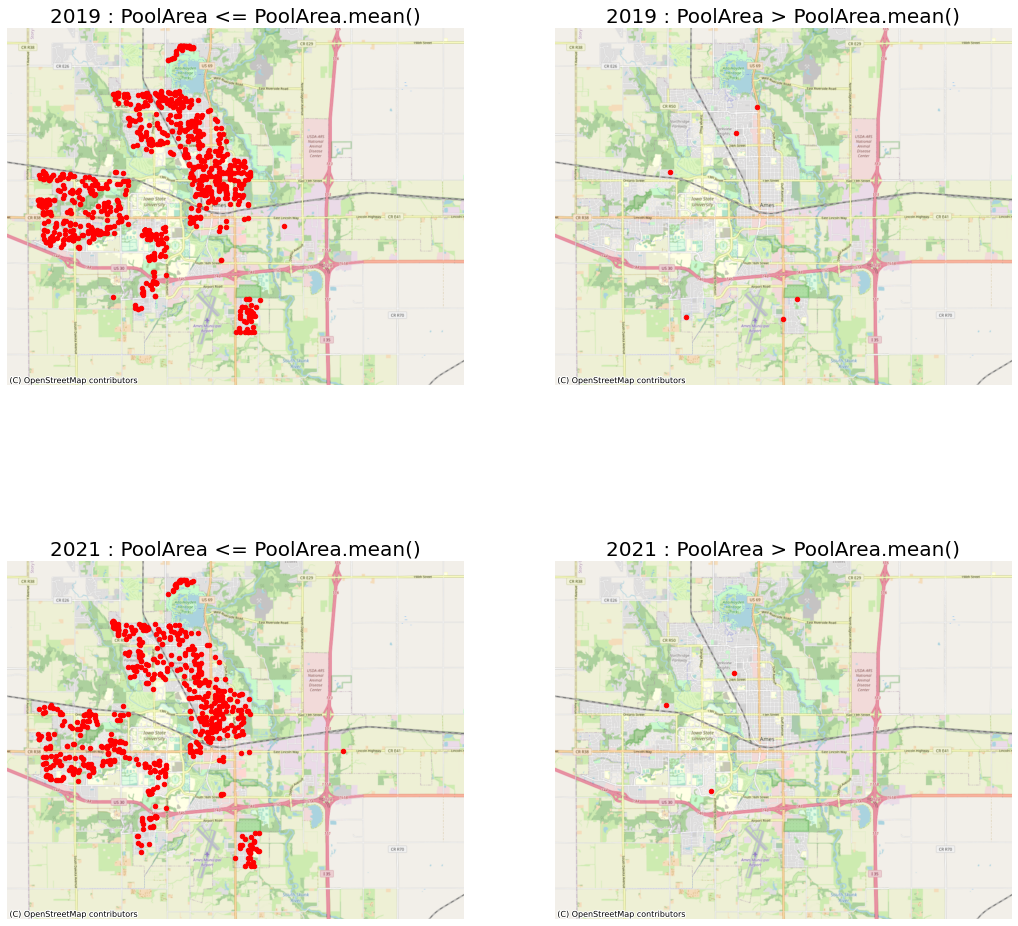

In [151]:
plot_by_attribute("PoolArea")

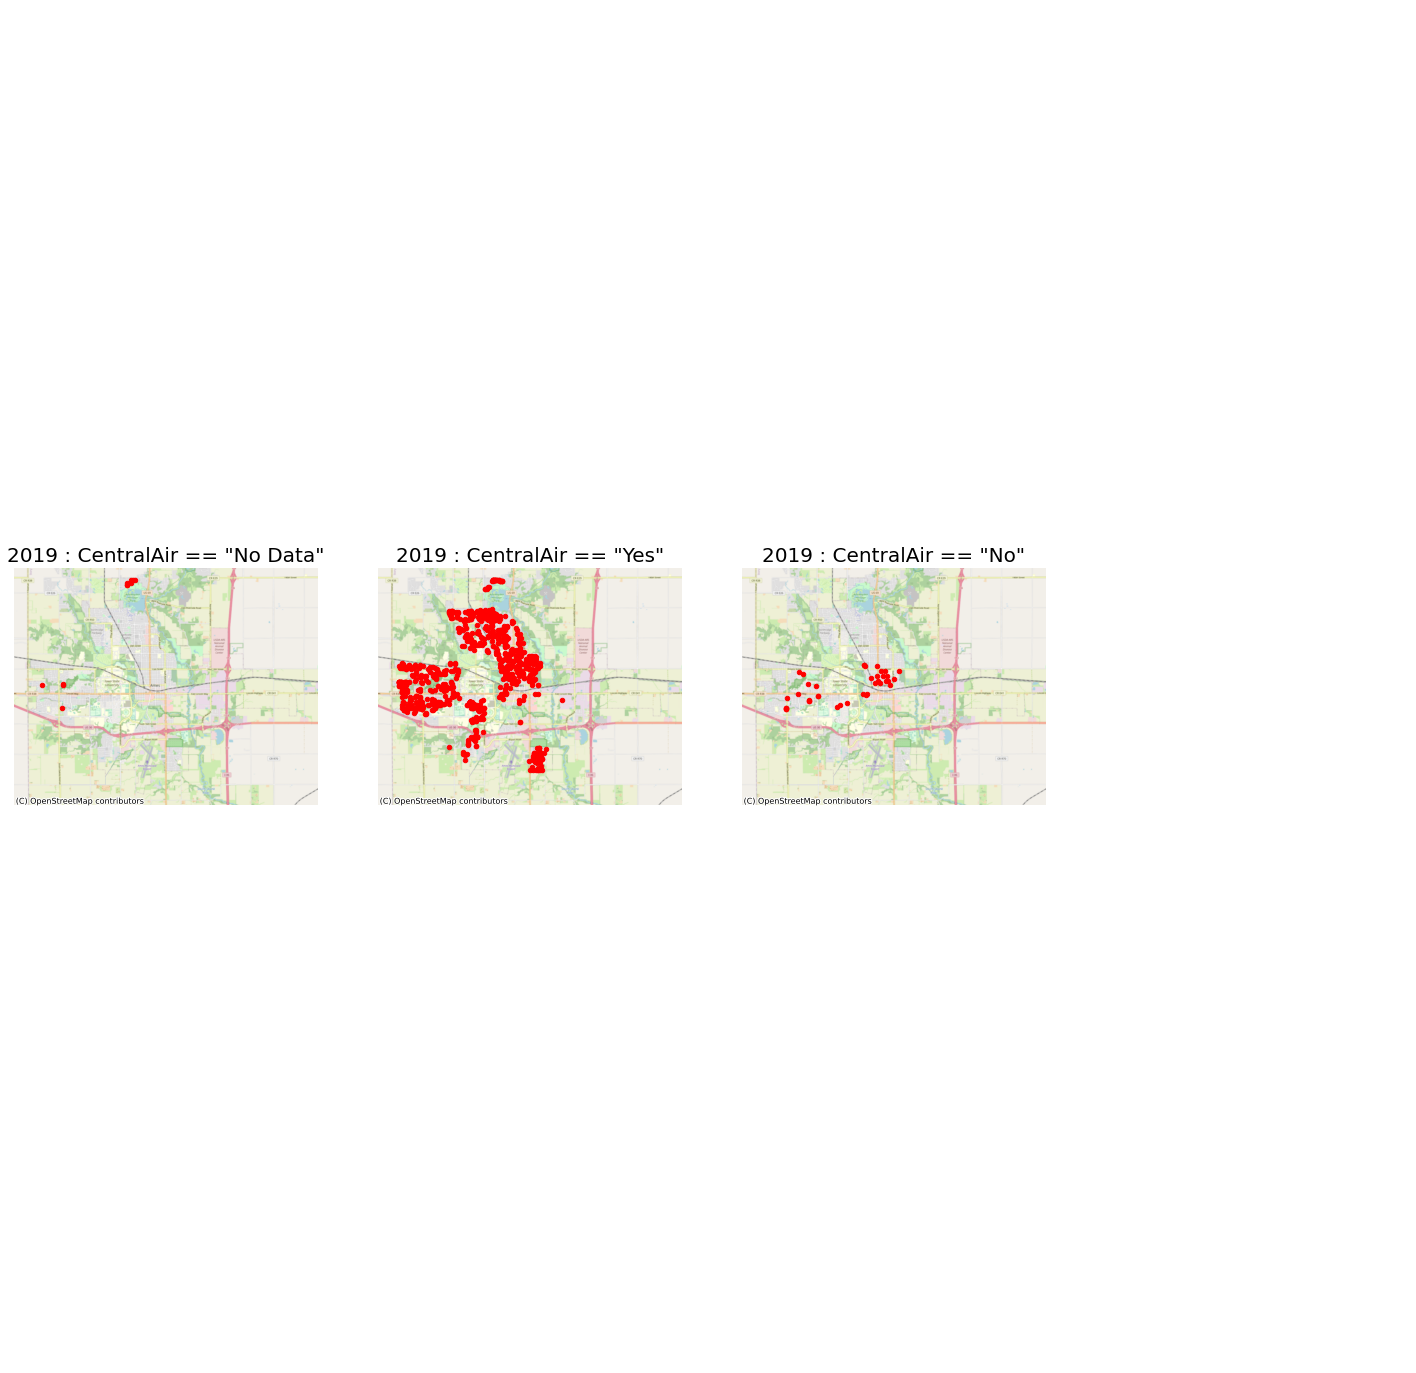

In [147]:
plot_by_categorical_attribute("", "2019")

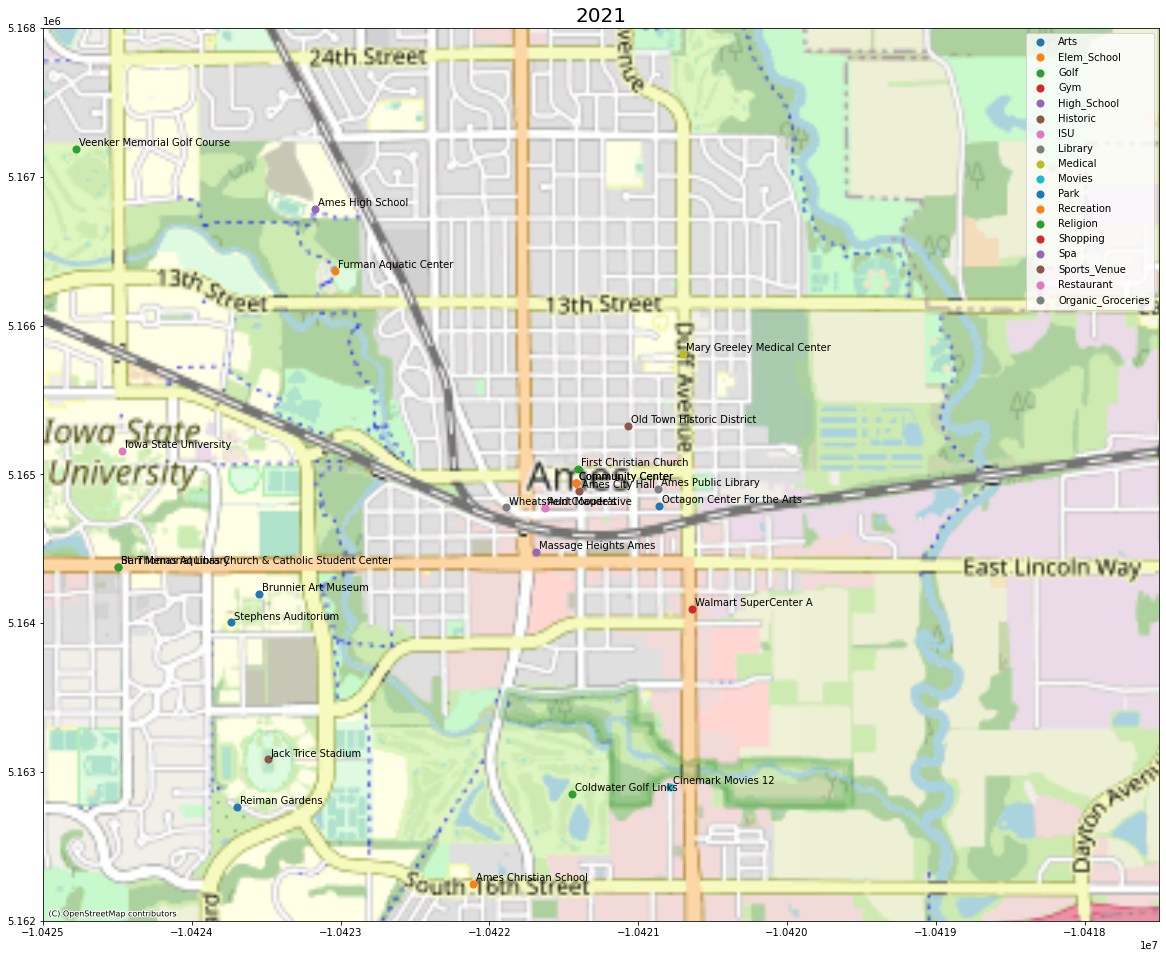

In [172]:
ax = df_wm.query("index > 0").plot(figsize = (20,20), alpha = 0)
for service in df_wm_biz.Service.unique():
    df_wm_biz.query(f"Service == '{service}'").plot(ax = ax, markersize = 50, marker = "o", label = service)

for row in df_wm_biz.iterrows():
    #print(row[1].Service, row[1].geometry)
    ax.annotate(row[1].Name, xy = (row[1].geometry.x, row[1].geometry.y), xytext = (3,3), textcoords = "offset points")
#df_wm_biz.query("Service == 'Gym'").plot(ax = ax, markersize = 50, color = "blue", marker = "o", label = "Gym")
cx.add_basemap(ax = ax, source = cx.providers.OpenStreetMap.Mapnik)
#plt.axis("off")
plt.xlim((-1.0425e7, -1.04175e7))
plt.ylim((5.162e6, 5.168e6))
plt.title(year, fontdict = {"fontsize":"20"})
plt.legend()
plt.show()

In [165]:
for row in df_wm_biz.iterrows():
    print(row[1].Service, row[1].geometry)
    #ax.annotate(service, xy = (df_wm_biz.geometry.x, df_wm_biz.geometry.y))

Arts POINT (-10423736.5015757 5164005.599215714)
Arts POINT (-10423545.13557866 5164197.092648083)
Arts POINT (-10420861.305032058 5164787.362271849)
Elem_School POINT (-10422856.502076663 5168445.01238308)
Elem_School POINT (-10422108.146781052 5162246.799768416)
Golf POINT (-10421447.730543582 5162852.620228477)
Golf POINT (-10424776.85234844 5167186.804309941)
Golf POINT (-10425965.688850367 5172076.212493404)
Gym POINT (-10421417.058684284 5164945.364719272)
Gym POINT (-10428820.59296403 5163195.805632814)
Gym POINT (-10424413.230571348 5168203.189980591)
Gym POINT (-10423702.02147662 5159728.720122781)
High_School POINT (-10423173.183764072 5166785.8346012775)
Historic POINT (-10421398.429367498 5164889.279215017)
Historic POINT (-10421069.174143607 5165326.53640378)
ISU POINT (-10424470.631353581 5165160.32724347)
Library POINT (-10420864.576711891 5164903.254853791)
Library POINT (-10424494.809946982 5164380.101001451)
Medical POINT (-10420696.608958624 5165811.724346088)
Movies